# ENSF 519.01 Applied Data Science 
**Assignment 2** - 100 marks

**Due:** October 18th, 04.00 pm.


**IMPORTANT NOTE: each task must be implemented as asked, even if there are other easier or better solutions.**

**How to deliver:**
Edit this file and write your solutions in sections specified with `# Your solution`. Test your code and when you are done, submit this notebook as an `.ipynb` file to D2L dropbox. 



## Problem 1 - Most popular movies (55 points)
In this assigment we want to do some basic data analysis on the most popular movies on IMDb right now. We do this in steps: first we take the list of most popular movies then we gather more informaion on each movie from the movie's page. These info are stored in pandas dataframes. Next we need to combine the information from these two tables, using pandas `merge` method. The resulting merged table might give us some insight on why some movies get more popular. Let's try and see what we can get!

Complete the `get_page_html` function below so that it gets the HTML content of any given url. We get the HTML content and store it in a variable just once, because:
1. Downloading the web page content takes ~1-2 seconds. While you're writing the html parser code you need to run and test your code many many times. If you download the whole page everytime you want to test the parser, these download times add up to significantly slow you down.
2. Making a lot of requests to the same page of a website in a short period of time might make the firewall suspicious of an attack and block your IP address

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

page_url = 'https://www.imdb.com/chart/top'

def get_page_html(url):
    response = requests.get(url)   
    return response.text
    
top_movies_html = get_page_html(page_url)

Parse the HTML content above using Beautiful Soup to extract these data:

* Rank (`rank`: int) **set this column as the index**
* Name of the movie (`name`: str) 
* Its release year (`release_year`: int)
* Rating (`rating`: float)
* link to its detail page (`detail_url`: str)

Store these in a pandas dataframe. The suggested column names and data types are specified in the parentheses above (20 points).

In [2]:
import re
import string

def get_top_movies(top_movies_page_html):    
    parser = BeautifulSoup(top_movies_page_html, 'html.parser')
    # Your solution.
    
    ranks = []
    names = []
    release_years = []
    ratings = []
    detail_urls = []
    
    table_rows = parser.findAll('table')[0].findAll('tr')
    for i in range(len(table_rows) - 1):
        row = table_rows[i + 1]
        ranks.append(get_rank(row))
        names.append(get_name(row))
        release_years.append(get_release_year(row))
        ratings.append(get_rating(row))
        detail_urls.append(get_detail(row))
        
            
    data = {'name': names, 'release_year': release_years, 'rating': ratings, 'detail_url': detail_urls}
    rv = pd.DataFrame(data, index=ranks)    
    # Create more functions to make your code cleaner and more organazied as necessary.
    return rv # A dataframe with the 4 columns mentioned above




def get_rank(table_row):
    title_column = table_row.contents[3]
    text = title_column.contents[0]
    rank = text.strip().strip('\.')
    return int(rank)

def get_name(table_row):
    title_column = table_row.contents[3]
    name = title_column.contents[1].text
    return name

def get_release_year(table_row):
    title_column = table_row.contents[3]
    year = title_column.contents[3].text
    year = year.strip('()')
    return int(year)

# REFACTOR THIS
def get_rating(table_row):
    rating_column = table_row.contents[5]
    text = rating_column.text
    rating = text.strip()
    return float(rating)

def get_detail(table_row):
    title_column = table_row.contents[3]
    uri = title_column.contents[1].get('href')
    return 'https://www.imdb.com' + uri



top_movies = get_top_movies(top_movies_html)
top_movies  # Rank must be the index, the rows should match the webpage

,name,release_year,rating,detail_url
1,The Shawshank Redemption,1994,9.2,https://www.imdb.com/title/tt0111161/
2,The Godfather,1972,9.1,https://www.imdb.com/title/tt0068646/
3,The Godfather: Part II,1974,9.0,https://www.imdb.com/title/tt0071562/
4,The Dark Knight,2008,9.0,https://www.imdb.com/title/tt0468569/
5,12 Angry Men,1957,8.9,https://www.imdb.com/title/tt0050083/
6,Schindler's List,1993,8.9,https://www.imdb.com/title/tt0108052/
7,The Lord of the Rings: The Return of the King,2003,8.9,https://www.imdb.com/title/tt0167260/
8,Pulp Fiction,1994,8.9,https://www.imdb.com/title/tt0110912/
9,"Il buono, il brutto, il cattivo",1966,8.8,https://www.imdb.com/title/tt0060196/
10,Fight Club,1999,8.8,https://www.imdb.com/title/tt0137523/


Now we proceed to step 2, we want to create a function that parses each individual movie's page. Just like the previous assignment on regular expressions, we try to get that working on one sample and only after we made sure that everything works properly we use a loop to get all the data that we need. 

In [3]:
avengers_url = 'https://www.imdb.com/title/tt4154796/'
avengers_html = get_page_html(avengers_url) 

Make a function that parses the html content of a movie details page and extracts these information:

* Movie length in minutes (int)
* Release date (convert the string to a python date object - use [`strptime` built-in function](https://www.programiz.com/python-programming/datetime/strptime) or regular expressions as you wish)
* List of genres (list of strings)
* Budget (int), if unavailable: ignore.
* Name of the directors (list)

Return these as a dictionary. You can extract more data as you wish. (20 points)

In [275]:
import re
from datetime import datetime 

def extract_movie_details(html):    
    parser = BeautifulSoup(html, 'html.parser')
    # Your solution
    time_tag = parser.find("div", {"class": "title_wrapper"}).find("div", {"class": "subtext"}).find("time")
    a_tags = parser.find("div", {"class": "title_wrapper"}).find("div", {"class": "subtext"}).find_all("a")
    director_tags = parser.find("div", {"class": "credit_summary_item"}).find_all("a")
    budget_tags = parser.find("div", {"id": "titleDetails"}).find_all("div", {"class": "txt-block"})    
    
    try:
        length = get_length(time_tag)
    except:
        length = None
    
    try:
        genres = get_genres(a_tags)
    except:
        genres = None
        
    try:
        release_date = get_release_date(a_tags)
    except:
        release_date = None
        
    try:
        budget = get_budget(budget_tags)
    except:
        budget = None
    
    try:
        directors = get_directors(director_tags)
    except:
        directors = None
   
    rv = {'length': length, 'genres': genres, 'release_date': release_date, 'budget': budget, 
          'directors': directors}
    
    return rv

def get_length(tag):
    text = tag.text.strip()
    hour, min = re.findall('(\d+)h (\d+)min',text)[0]
    return int(hour)*60 + int(min)

def get_genres(tags):
    genres = []
    for tag in tags:
        if not any(char.isdigit() for char in tag.text):
            genres.append(tag.text)
    return genres

def get_release_date(tags):
    date = None
    for tag in tags:
        if any(char.isdigit() for char in tag.text):
            date = tag.text
            break
    date = re.findall('(\d+ \w+ \d{4})', date)[0]
    date = datetime.strptime(date, "%d %B %Y")
    return date

def get_budget(tags):
    budget_tag = None
    for tag in tags:
        if "Budget" in tag.text:
            budget_tag = tag
            break
    budget = re.findall('\$(.+)', budget_tag.text)[0]
    budget = re.sub(',', '', budget)
    return int(budget)

def get_directors(tags):
    directors = []
    for tag in tags:
        directors.append(tag.text)
    return directors
    
    
avengers_data = extract_movie_details(avengers_html)
print(avengers_data) 
# Expected: {
#     'length': 181, 
#     'genres': ['action', 'adventure', 'sci-fi'], 
#     'release_date': datetime.datetime(2019, 4, 26, 0, 0),
#     'budget': 356000000,
#     'directors': ['Anthony Russo', 'Joe Russo']
# }

{'length': 181, 'genres': ['Action', 'Adventure', 'Sci-Fi'], 'release_date': datetime.datetime(2019, 4, 26, 0, 0), 'budget': 356000000, 'directors': ['Anthony Russo', 'Joe Russo']}


Now get the list of detail page urls for all the movies:

In [276]:
urls = top_movies.set_index('name')['detail_url']
urls

name
The Shawshank Redemption                             https://www.imdb.com/title/tt0111161/
The Godfather                                        https://www.imdb.com/title/tt0068646/
The Godfather: Part II                               https://www.imdb.com/title/tt0071562/
The Dark Knight                                      https://www.imdb.com/title/tt0468569/
12 Angry Men                                         https://www.imdb.com/title/tt0050083/
Schindler's List                                     https://www.imdb.com/title/tt0108052/
The Lord of the Rings: The Return of the King        https://www.imdb.com/title/tt0167260/
Pulp Fiction                                         https://www.imdb.com/title/tt0110912/
Il buono, il brutto, il cattivo                      https://www.imdb.com/title/tt0060196/
Fight Club                                           https://www.imdb.com/title/tt0137523/
The Lord of the Rings: The Fellowship of the Ring    https://www.imdb.com/title/tt012

and loop through the movie name and urls created above (`urls`), use `extract_movie_details` and create a data frame out of the dictionaries. The dataframe should have a column storing the movie name and one column for each item in the dictionary (length, genres, ...). If any piece of data was not availble for a movie (e.g. budget might not be available for some) just leave it, pandas will use `NaN` for that cell. (10 points)

In [277]:
# Your solution
names = list(urls.index.values)
lengths = []
genres = []
release_dates = []
budgets = []
directors = []

counter = 0
for url in urls:
    html = get_page_html(url)
    rv = extract_movie_details(html)
    lengths.append(rv['length'])
    genres.append(rv['genres'])
    release_dates.append(rv['release_date'])
    budgets.append(rv['budget'])
    directors.append(rv['directors'])
    # To show that code is processing 
    print(counter)
    counter = counter + 1
    

data = {'name': names, 'length': lengths, 'genres': genres, 'release_date': release_dates, 'budget': budgets,
       'directors': directors}
movie_details = pd.DataFrame(data)
movie_details    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


,name,length,genres,release_date,budget,directors
0,The Shawshank Redemption,142.0,[Drama],1994-10-14,25000000.0,[Frank Darabont]
1,The Godfather,175.0,"[Crime, Drama]",1972-03-24,6000000.0,[Francis Ford Coppola]
2,The Godfather: Part II,202.0,"[Crime, Drama]",1974-12-20,13000000.0,[Francis Ford Coppola]
3,The Dark Knight,152.0,"[Action, Crime, Drama]",2008-07-18,185000000.0,[Christopher Nolan]
4,12 Angry Men,96.0,[Drama],1957-04-10,350000.0,[Sidney Lumet]
5,Schindler's List,195.0,"[Biography, Drama, History]",1993-12-25,22000000.0,[Steven Spielberg]
6,The Lord of the Rings: The Return of the King,201.0,"[Adventure, Drama, Fantasy]",2003-12-17,94000000.0,[Peter Jackson]
7,Pulp Fiction,154.0,"[Crime, Drama]",1994-10-14,8000000.0,[Quentin Tarantino]
8,"Il buono, il brutto, il cattivo",161.0,[Western],1966-12-23,1200000.0,[Sergio Leone]
9,Fight Club,139.0,[Drama],1999-10-15,63000000.0,[David Fincher]


Use pandas' `merge` method to join these two tables into one. Merge on movie name. (5 points)

In [278]:
merged = pd.merge(
    # Your solution
    top_movies,
    movie_details,
    on='name'
)
merged

,name,release_year,rating,detail_url,length,genres,release_date,budget,directors
0,The Shawshank Redemption,1994,9.2,https://www.imdb.com/title/tt0111161/,142.0,[Drama],1994-10-14,25000000.0,[Frank Darabont]
1,The Godfather,1972,9.1,https://www.imdb.com/title/tt0068646/,175.0,"[Crime, Drama]",1972-03-24,6000000.0,[Francis Ford Coppola]
2,The Godfather: Part II,1974,9.0,https://www.imdb.com/title/tt0071562/,202.0,"[Crime, Drama]",1974-12-20,13000000.0,[Francis Ford Coppola]
3,The Dark Knight,2008,9.0,https://www.imdb.com/title/tt0468569/,152.0,"[Action, Crime, Drama]",2008-07-18,185000000.0,[Christopher Nolan]
4,12 Angry Men,1957,8.9,https://www.imdb.com/title/tt0050083/,96.0,[Drama],1957-04-10,350000.0,[Sidney Lumet]
5,Schindler's List,1993,8.9,https://www.imdb.com/title/tt0108052/,195.0,"[Biography, Drama, History]",1993-12-25,22000000.0,[Steven Spielberg]
6,The Lord of the Rings: The Return of the King,2003,8.9,https://www.imdb.com/title/tt0167260/,201.0,"[Adventure, Drama, Fantasy]",2003-12-17,94000000.0,[Peter Jackson]
7,Pulp Fiction,1994,8.9,https://www.imdb.com/title/tt0110912/,154.0,"[Crime, Drama]",1994-10-14,8000000.0,[Quentin Tarantino]
8,"Il buono, il brutto, il cattivo",1966,8.8,https://www.imdb.com/title/tt0060196/,161.0,[Western],1966-12-23,1200000.0,[Sergio Leone]
9,Fight Club,1999,8.8,https://www.imdb.com/title/tt0137523/,139.0,[Drama],1999-10-15,63000000.0,[David Fincher]


# Problem 2 - Visualizing and Analysing (45 points)

Now, we have a data frame containing information about the most popular IMDb movies as of now. In this part we are going to use matplotlib to visualize those data and see if we can find any meaningful features that can predict success of a movie. 

This problem uses the results of the problem 1. If you can't do Problem 1 for any reason, we have a csv file uploaded on D2L that contains the final result of Problem 1. You can download that file and use `pd.read_csv` to create a dataframe from it. Please note that you need to convert the release date from an string to a datetime object. Also you need to parse the `genres` and `directors` columns into python lists.

## Releasing Season and Year
First, create a column that contains which season the movie was released in, if data isn't available ignore that row. Then use pandas aggregation methods to count the movies released in each season of the year. Plot a [bar chart](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py) that shows the average rating of movies made in each season per year for the last **20 years**. Show the 4 seasons of each year next to each other. Use the ticks on X axis to show the year and the colours of the bars to show the season. Also, put a legend on the chart. (10 points)

/home/sadat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


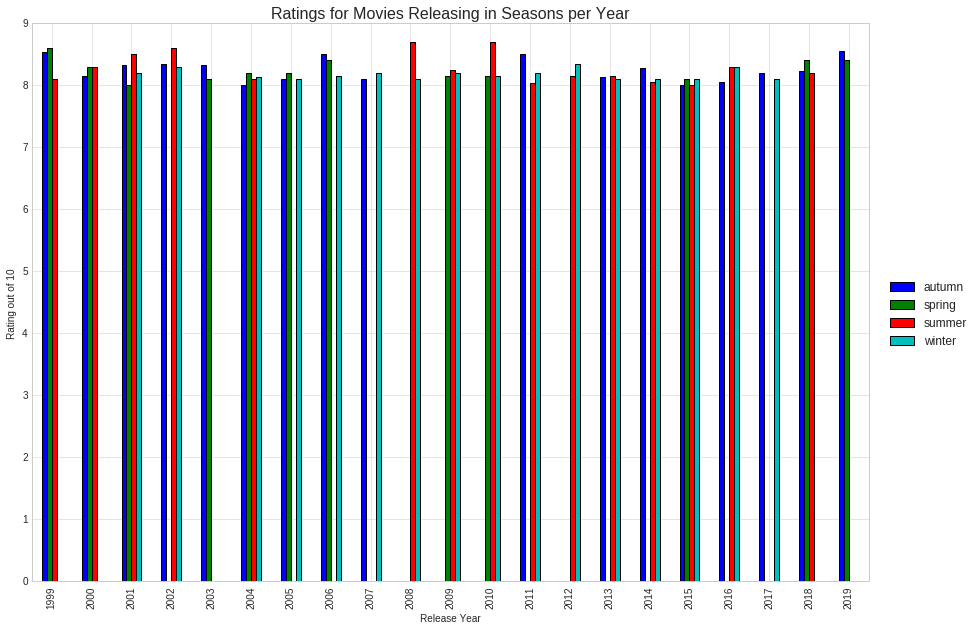

In [348]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import timedelta, date

## Random year, doesn't matter
Y = 2000
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

datetime_old = datetime.now() - timedelta(days=20*365)
df = merged.loc[merged['release_year'] >= datetime_old.year]

seasons_row = []
for index, row in df.iterrows():
    movie_date = row['release_date']
    now = movie_date.date()
    now = now.replace(year=Y)
    
    season_entry = None
    for season, (start, end) in seasons:
        if start <= now <= end:
            season_entry = season
            break
    
    seasons_row.append(season_entry)

df['season'] = seasons_row

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

counts = df.groupby(['release_year', 'season'])['rating'].mean()
counts.unstack().plot.bar(ax=ax, figsize=(15,10))

ax.set_title("Ratings for Movies Releasing in Seasons per Year", fontsize=16)
ax.set_ylabel("Rating out of 10")
ax.set_xlabel("Release Year")
ax.legend('')
fig.legend(loc='right')

## Genre and Directors

Create two pie charts in a figure next to each other. In one, plot the number of movies in each genre and in the other, plot the number of movies directed by each director. Since there are many directors only keep the people who have directed 3 movies or more. First create two dataframes for the charts. One should have two columns:
* genre (set as **index**)
* count_ratings
* mean_ratings (**sort the dataframe** by this column in decending order)

and the other one:
* name (set as **index**)
* count_movies (**sort the dataframe** by this column in decending order)

After making the dataframes you can proceed to drawing the two [pie charts](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py) based on them. Sorting the table before drawing the charts make the slices sorted, try drawing charts for the same data but comment out the line of code you wrote for sorting and see the difference. Make an appropriate title for each chart, also show the name of each genre/each director next to each pie slice. (20 points)

In [395]:
df = merged.copy()

genre_stats = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
genre_stats.name = 'genre'
genre_stats = df.drop('genres', axis=1).join(genre_stats)

genre_stats = genre_stats.groupby('genre').aggregate({'name':'count', 'rating':'mean'})
genre_stats = genre_stats.sort_values('name', ascending=False)
genre_stats

,name,rating
genre,,
Drama,182,8.254396
Adventure,57,8.270175
Crime,56,8.269643
Comedy,44,8.188636
Thriller,37,8.213514
Action,36,8.283333
Mystery,27,8.240741
Biography,25,8.216000
Sci-Fi,24,8.279167


In [281]:
director_stats = df.apply(lambda x: pd.Series(x['directors']),axis=1).stack().reset_index(level=1, drop=True)
director_stats.name = 'director'
director_stats = df.drop('directors', axis=1).join(director_stats)

director_stats = director_stats.groupby('director').aggregate({'name':'count'})
director_stats = director_stats.sort_values('name', ascending=False)
director_stats = director_stats[director_stats.name > 2]
director_stats

,name
director,
Christopher Nolan,7
Martin Scorsese,7
Stanley Kubrick,7
Steven Spielberg,6
Alfred Hitchcock,6
Hayao Miyazaki,6
Billy Wilder,6
Akira Kurosawa,5
Quentin Tarantino,5


Text(0, 0.5, '')

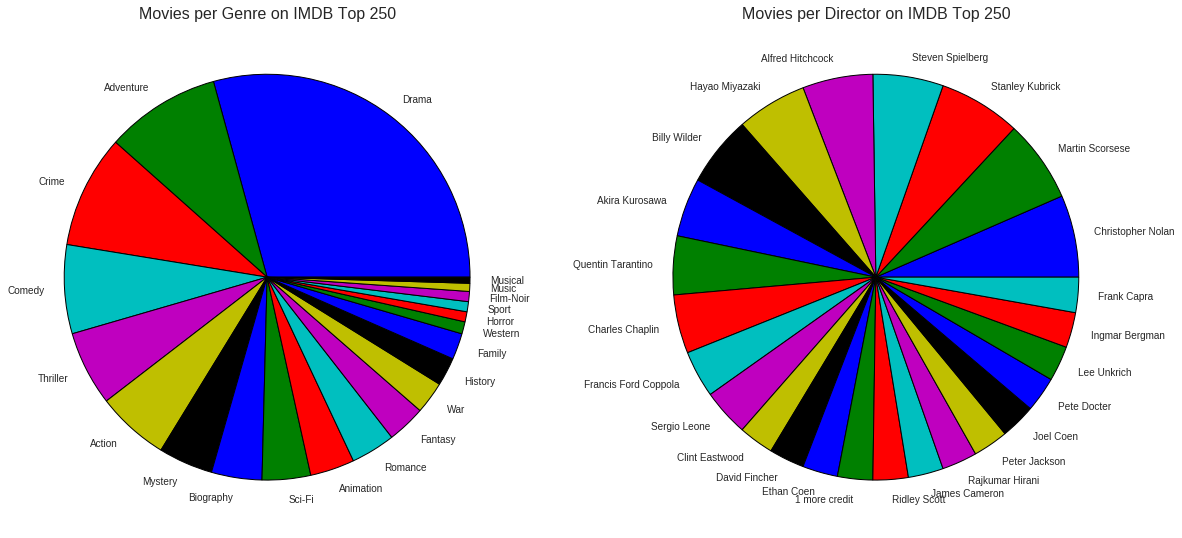

In [396]:
fig, (counts_axis, directors_axis) = plt.subplots(1, 2, figsize=(20, 10))

# Your solution
genre_stats.plot.pie(ax=counts_axis, y='name', legend=None)
counts_axis.set_title('Movies per Genre on IMDB Top 250', fontsize=16)
counts_axis.set_ylabel('')

director_stats.plot.pie(ax=directors_axis, y='name', legend=None)
directors_axis.set_title('Movies per Director on IMDB Top 250', fontsize=16)
directors_axis.set_ylabel('')

## Budget

Make a scatter plot with movies length and budget as the x and y axes. Since the budgets are not adjusted for inflation, to approximate that, color code the data points so that the movies that are released in the same decade have the same color. Use `alpha` parameter to make the points 50% transparent so that overlapping points are better visible. Set the proper axis labels and chart title. Also add a `colorbar` to show which color is associated with which decade. (15 points)

In [351]:
df = merged.loc[:, ('name', 'release_year', 'budget', 'length')].copy()
df['decade'] = (df['release_year'] / 10).apply(np.int64) # Your solution
df.drop('release_year', axis=1, inplace=True)
df = df[df['budget'] > 0]
df = df[df['length'] > 0]
df

,name,budget,length,decade
0,The Shawshank Redemption,25000000.0,142.0,199
1,The Godfather,6000000.0,175.0,197
2,The Godfather: Part II,13000000.0,202.0,197
3,The Dark Knight,185000000.0,152.0,200
4,12 Angry Men,350000.0,96.0,195
5,Schindler's List,22000000.0,195.0,199
6,The Lord of the Rings: The Return of the King,94000000.0,201.0,200
7,Pulp Fiction,8000000.0,154.0,199
8,"Il buono, il brutto, il cattivo",1200000.0,161.0,196
9,Fight Club,63000000.0,139.0,199


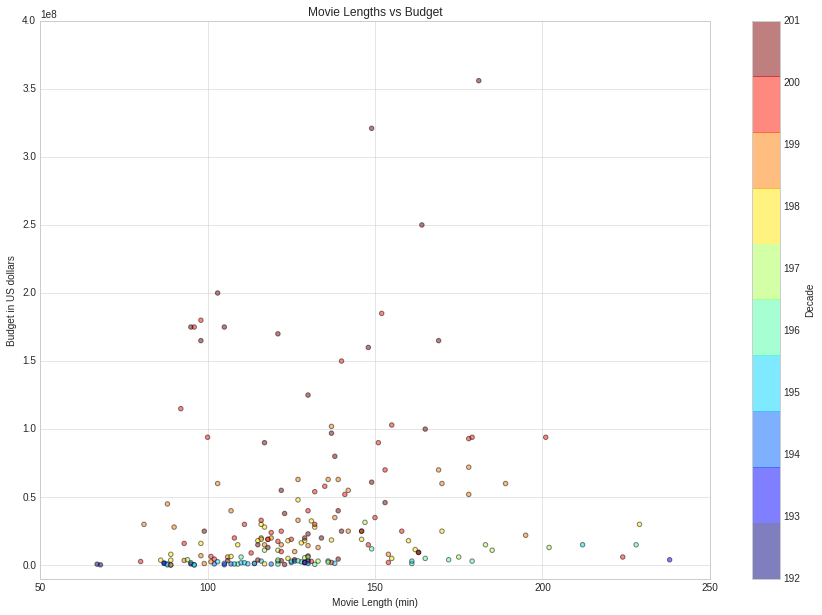

In [394]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plt.style.use('seaborn-whitegrid')

number_of_unique_decades = df['decade'].nunique() # Your solution
color_map = plt.get_cmap('jet', number_of_unique_decades)
# Your solution
df.plot.scatter(ax=ax, x='length', y='budget', c='decade', colormap=color_map, alpha=0.5)
ax.set_title('Movie Lengths vs Budget')
ax.set_xlabel('Movie Length (min)')
ax.set_ylabel('Budget in US dollars')
ax.set_ylim(-10000000,400000000)
f = plt.gcf()
colorbar = f.get_axes()[1]
colorbar.set_ylabel("Decade")
colorbar.ticklabel_format(useOffset=False)
